# Reserves

The term reserves is sometimes used in place of policy values. AMLCR uses policy value to mean the expected value of the future loss random variable, and restricts reserve to mean the actual capital held in respect of a policy, which may be
greater than or less than the policy value.

## Recursion

The following recursive formulae relating $_tV$ to $_{t+1}V$ for policy values can be derived for policies with discrete cash flows. 

__Gross reserves__

$( _tV^g + G - e)(1 + i) = q_{x+t} ~ (b + E) + p_{x+t} ~ _{t+1}V^g$

- recursion for gross reserves

__Net reserves__

$( _tV + P)(1 + i) = q_{x+t} ~ b + p_{x+t} ~ _{t+1}V$

- recursion for net reserves

__Expense reserves__

$( _tV^e + P^e - e)(1 + i) = q_{x+t} ~ E + p_{x+t} ~ _{t+1}V^e$

- recursion for expense reserves



## Interim reserves

Recursive formulae for interim reserves $_{t+r}V$ where $0 \le r \le 1$ can be similarly obtained:

$( _tV + P)(1 + i)^r =~ _rq_{x+t} ~ b ~ v^{1-r} + ~_rp_{x+t} ~ _{t+r}V$

- forward recursion for interim net reserves

$_{t+r}V ~ (1 + i)^{1-r} =~  _{1-r}q_{x+t+r} ~ b + ~_{1-r}p_{x+t+r} ~ _{t+1}V$

- backward recursion for interim net reserves


## Modified reserves

Because acquisition expenses are large relative to the renewal and claims expenses, accounting with level net premiums typically results in large negative values for expense reserves (called deferred acquisition costs or DAC) particularly at issue.  
Modified premium reserves are computed without expenses, and modifies the net premium method to assume a lower initial premium that allow implicitly for the DAC.


__Full Preliminary Term__

FPT is the most common method for modifying reserves. It treats the insurance policy as one-year term insurance combined with a policy as if it were issued one year later.

$\alpha = A^{1}_{x:\overline{1|}} = v ~ q_x$

- initial FPT premium

$\beta = \dfrac{A_{x+1}}{\ddot{a}_{x+1}}$

- renewal FPT premium 

$_0V^{FPT} ~ = ~ _1V^{FPT} ~ = 0$

- since renewal premium set year 1 policy value to 0, while initial premium set to equal year 1 expected benefits.

$_tV^{FPT}$ for $(x) ~= ~ _{t-1}V$ for $(x+1)$
- since renewal FPT premium for (x) is net premium for (x+1) with term lengths adjusted


## Examples

The `Reserves` class implements methods to solve reserves by recursion, and compute interim and modified reserves.

In [1]:

from actuarialmath.reserves import Reserves
from actuarialmath.policyvalues import Contract

__SOA Question 7.31__

For a fully discrete 3-year endowment insurance of 1000 on (x), you are given:
-  Expenses, payable at the beginning of the year, are:

| Year(s) | Percent of Premium | Per Policy |
|---|---|---|
| 1 | 20% | 15 |
| 2 and 3 | 8% | 5 |

- The expense reserve at the end of year 2 is –23.64
- The gross annual premium calculated using the equivalence principle is G = 368.
- $G = 1000 P_{x:\overline{3|}} + P^e$ , where $P^e$ is the expense loading

Calculate $P_{x:\overline{3|}}$ .

In [2]:
print("SOA Question 7.31:  (E) 0.310")
x = 0
life = Reserves().set_reserves(T=3)
G = 368.05
def fun(P):  # solve net premium from expense reserve equation
    return life.t_V(x=x, t=2, premium=G-P, benefit=lambda t: 0, 
                    per_policy=5 + .08*G)
P = life.solve(fun, target=-23.64, grid=[.29, .31]) / 1000
print(P)

SOA Question 7.31:  (E) 0.310
0.309966


__AMLCR2 Figure 7.4__:

Policy values for each year of a 20-year term insurance, sum insured $500,000, issued to (50). Mortality follows the Standard Ultimate Life Table (note AMLCR2 used Standard Select Table), with interest rate $i=0.05$.

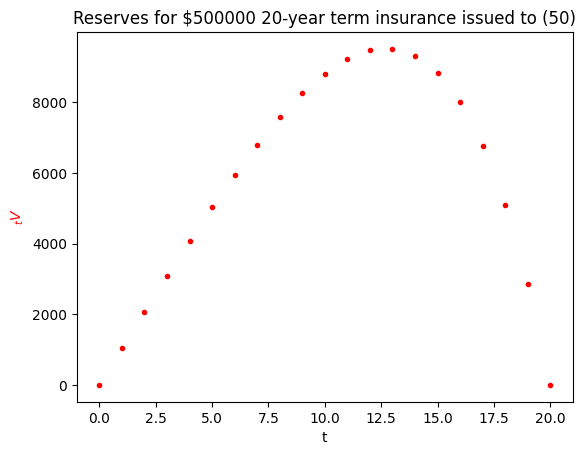

In [3]:
from actuarialmath.sult import SULT
life = SULT()
x, T, b = 50, 20, 500000    # $500K 20-year term insurance for (50)               
P = life.net_premium(x=x, t=T, b=b)
life.set_reserves(T=T)\
    .fill_reserves(x=x, contract=Contract(premium=P, benefit=b))
life.V_plot(title=f"Reserves for ${b} {T}-year term insurance issued to ({x})")

__AMLCR2 Figure 7.3__:

Policy values for each year of a 20-year endowment insurance, sum insured $500,000, issued to (50). Mortality follows the Standard Ultimate Life Table (note AMLCR2 used Standard Select Table), with interest rate $i=0.05$.

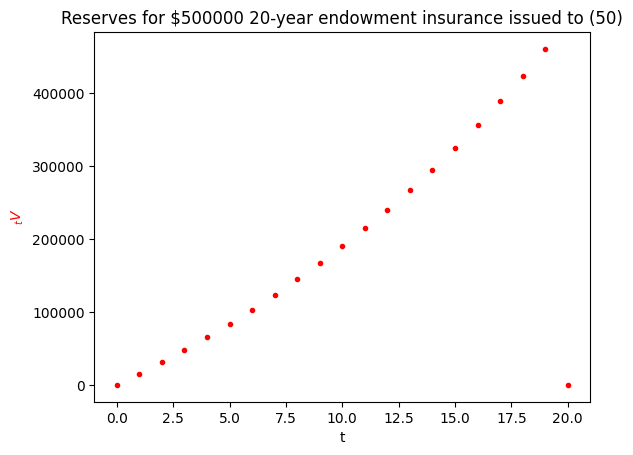

In [4]:
from actuarialmath.sult import SULT
life = SULT()
x, T, b = 50, 20, 500000    # $500K 20-year term insurance for (50)               
P = life.net_premium(x=x, t=T, b=b, endowment=b)
life.set_reserves(T=T)\
    .fill_reserves(x=x, contract=Contract(premium=P, benefit=b, endowment=b))
life.V_plot(title=f"Reserves for ${b} {T}-year endowment insurance issued to ({x})")

## Methods

In [5]:
import describe
describe.methods(Reserves)


class Reserves - Compute recursive, interim and modified reserves

    Methods:
    --------

    set_reserves(T, endowment, V):
      Set values of the reserves table and the endowment benefit amount

    fill_reserves(x, s, reserve_benefit, contract):
      Iteratively fill in missing values in reserves table

    t_V_forward(x, s, t, premium, benefit, per_premium, per_policy, reserve_benefit):
      Forward recursion (with optional reserve benefit)

    t_V_backward(x, s, t, premium, benefit, per_premium, per_policy, reserve_benefit):
      Backward recursion (with optional reserve benefit)

    t_V(x, s, t, premium, benefit, reserve_benefit, per_premium, per_policy):
      Solve year-t reserves by forward or backward recursion

    r_V_forward(x, s, r, premium, benefit):
      Forward recursion for interim reserves

    r_V_backward(x, s, r, benefit):
      Backward recursion for interim reserves

    FPT_premium(x, s, n, b, first):
      Initial or renewal Full Preliminary Term p